# Importing Libraries

In [1]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 1.3 MB/s 
     |████████████████████████████████| 3.5 MB 37.5 MB/s 
     |████████████████████████████████| 3.6 MB 46.7 MB/s 
     |████████████████████████████████| 322 kB 45.6 MB/s 
     |████████████████████████████████| 86.4 MB 18 kB/s 
     |████████████████████████████████| 18.3 MB 1.2 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 2.9 MB 59.6 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 3.8 MB 40.0 MB/s 
     |████████████████████████████████| 449 kB 54.2 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=409fdb1cf2db906de06d9d4dd0fbbc3a69b9046f2e349f53e71af0f8bb50f8db
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=470a656cb1

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import turicreate as tc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Importing Data

In [3]:
# Exception Handeling for Data Sorting in pandas
pd.options.mode.chained_assignment = None
ori_data = pd.read_csv('fashion_data.csv')
ori_data

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


In [4]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192482 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192199 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [5]:
ori_data.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


# Data Preprocessing

# Looking for missing values

In [6]:
df=ori_data
df.isna().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

# Remove unwanted columns

In [7]:
df=df.drop(columns=['review_date','review_summary','review_text'],axis=1)

# Exploratory Data Analysis

# Feature Engineering

# Age 

People between the Age 25-35 have higher concentration in the histogram so more importance should be given to this age group


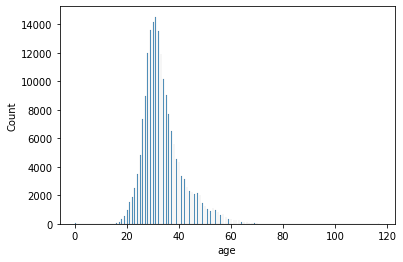

In [8]:
sns.histplot(x=df['age'],data=df)
print("People between the Age 25-35 have higher concentration in the histogram so more importance should be given to this age group")

In [9]:
df['age_percentiles'] = pd.qcut(df['age'], 5, labels=False)
df = df[~df['age_percentiles'].isnull()]
df=df.drop(columns=['age'],axis=1)

# Weight

In [10]:
df['weight'] = df['weight'].apply(lambda x : int(x[:-3]) if type(x) == str else x)
df['weight'].fillna((df['weight'].mean()), inplace=True)

# Height 

#  Converting Feet to cm and inch to cm

In [11]:
df['height'] = df['height'].apply(lambda x : (int(x.split("\'")[0]) * 30.48) + (int(x.split("\'")[1][:-1]) * 2.54) if type(x) == str else x)
df['height'].fillna((df['height'].mean()), inplace=True)

# Rented For

In [12]:
df['rented for'].fillna('other', inplace=True)

# Rating

In [13]:
df['rating'].fillna((df['rating'].mean()), inplace=True)

# Bust Size

# Filling missing values of bust size using  most used size in that particular age_group 

In [14]:
def preprocessBustsize(age_Preprocessed_data):
    data_bust_size_not_null = df[~df['bust size'].isnull()]
    data_bust_size_not_null['bust size'] = data_bust_size_not_null['bust size'].apply(lambda x : (int(x[:2]), x[2:]))
    data_bust_size_not_null[['bust Size1', 'bust']] = pd.DataFrame(data_bust_size_not_null['bust size'].tolist(), index=data_bust_size_not_null.index)
    bustDict = {'a': 1, 'aa': 1, 'b': 2, 'c': 3, 'd': 4, 
                'd+': 5, 'dd': 5, 'ddd/e': 6,
               'f':7 , 'g': 8, 'h': 9, 'i': 10, 'j': 11}
    data_bust_size_not_null['bust1'] = data_bust_size_not_null['bust'].map(bustDict)
    # Calculating model of bust size based on age grp.
    def funct(df):
        return df.mode()
    x = data_bust_size_not_null[['age_percentiles','bust Size1','bust1']].groupby('age_percentiles').apply(funct)
    x.reset_index(inplace= True, drop = True)
    data_bust_size_null = df[df['bust size'].isnull()]
    data_bust_size_null = pd.merge(data_bust_size_null, x, how ='left', left_on = 'age_percentiles', right_on = 'age_percentiles')
    data_bust_size_cleansed = data_bust_size_not_null.append(data_bust_size_null)
    del x, data_bust_size_not_null , data_bust_size_null , bustDict
    return data_bust_size_cleansed

In [15]:
df=preprocessBustsize(df)
df=df.drop(columns=['bust size','bust'])
df

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,age_percentiles,bust Size1,bust1
0,fit,420272,2260466,137.000000,10.0,vacation,hourglass,romper,172.72,14,0.0,34,4
1,fit,273551,153475,132.000000,10.0,other,straight & narrow,gown,167.64,12,3.0,34,2
3,fit,909926,126335,135.000000,8.0,formal affair,pear,dress,165.10,8,2.0,34,3
4,fit,151944,616682,145.000000,10.0,wedding,athletic,gown,175.26,12,0.0,34,2
5,fit,734848,364092,138.000000,8.0,date,athletic,dress,172.72,8,4.0,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18367,fit,639521,1578743,170.000000,8.0,vacation,NaN,shirtdress,165.10,35,4.0,34,3
18368,fit,78599,672419,136.000000,10.0,party,hourglass,gown,160.02,12,3.0,34,3
18369,fit,483983,2316191,125.000000,6.0,work,NaN,top,157.48,12,4.0,34,3
18370,small,449110,914136,137.389208,8.0,wedding,full bust,dress,157.48,16,1.0,34,3


# Body type

# Classifier to predict body type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


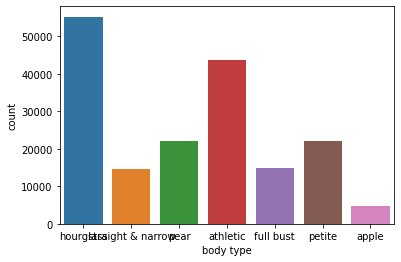

In [16]:
sns.countplot(df['body type'])

# Splitting the data into train and test set

In [17]:
feature_names = ['age_percentiles', 'bust Size1','bust1','size','height','weight']
data_body_type_not_null = df[~df['body type'].isnull()]
data_body_type_null = df[df['body type'].isnull()]
X=data_body_type_not_null[feature_names]
y=data_body_type_not_null['body type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Training Random Forest Classifier

In [18]:
rf = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Performance

# Precision

In [19]:
y_pred=rf.predict(X_test)
precision_score(y_test, y_pred,average='weighted')

0.5392372083323451

# Recall

In [20]:
recall_score(y_test, y_pred,average='weighted')

0.5425680548043987

# F1 Score

In [21]:
f1_score(y_test, y_pred,average='weighted')

0.5391121526416416

# Confusion Matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 320,  147,  104,  397,  131,   28,    6],
       [  56, 5788,  287, 2559,  922,  747,  635],
       [  74,  266, 1722, 1435,  123,   95,   44],
       [ 188, 2352,  828, 8430,  867,  735,  387],
       [  73, 1330,  149, 1293, 2167,  303,  189],
       [  24,  621,   93,  612,  207, 3803,  165],
       [   9,  888,   45,  479,  182,  224, 1847]])

In [23]:
data_body_type_null['body type']=rf.predict(data_body_type_null[feature_names])
df=data_body_type_not_null
df.append(data_body_type_null)
del X_train, X_test, y_train, y_test , y_pred , data_body_type_not_null , data_body_type_null , X , y 
df

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,age_percentiles,bust Size1,bust1
0,fit,420272,2260466,137.000000,10.0,vacation,hourglass,romper,172.72,14,0.0,34,4
1,fit,273551,153475,132.000000,10.0,other,straight & narrow,gown,167.64,12,3.0,34,2
3,fit,909926,126335,135.000000,8.0,formal affair,pear,dress,165.10,8,2.0,34,3
4,fit,151944,616682,145.000000,10.0,wedding,athletic,gown,175.26,12,0.0,34,2
5,fit,734848,364092,138.000000,8.0,date,athletic,dress,172.72,8,4.0,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18364,fit,644536,183194,137.389208,8.0,wedding,pear,dress,172.72,8,1.0,34,3
18366,fit,958848,152836,110.000000,10.0,party,petite,mini,160.02,1,2.0,34,2
18368,fit,78599,672419,136.000000,10.0,party,hourglass,gown,160.02,12,3.0,34,3
18370,small,449110,914136,137.389208,8.0,wedding,full bust,dress,157.48,16,1.0,34,3


# Save model

In [24]:
# save the model to disk
filename = 'body_type_classifier_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Customer Segmentation

# Clustering Based on body type and rented for

# Encoding Categorical features

In [25]:
data=df['body type']
values = np.array(data)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False,drop='first')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
df1=pd.DataFrame(onehot_encoded)
data=df['rented for']
values = np.array(data)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False,drop='first')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
df2=pd.DataFrame(onehot_encoded)
df3=pd.concat([df1,df2],axis=1)

In [26]:
df3

,0,1,2,3,4,5,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177497,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
177498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
177499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
177500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# K - means Clustering 

# Using the elbow method to find the optimal number of clusters

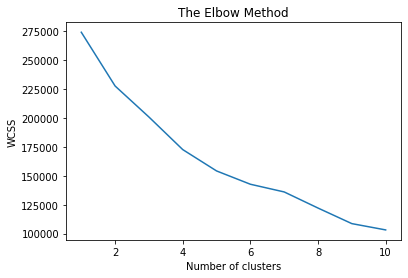

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
num_of_clusters=5

# Training the K-Means model on the dataset

In [28]:
kmeans = KMeans(n_clusters = num_of_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df3)
df['cluster']=y_kmeans
del y_kmeans , wcss , df1 , df2 , df3 , integer_encoded , onehot_encoded , label_encoder

In [29]:
df

,fit,user_id,item_id,weight,rating,rented for,body type,category,height,size,age_percentiles,bust Size1,bust1,cluster
0,fit,420272,2260466,137.000000,10.0,vacation,hourglass,romper,172.72,14,0.0,34,4,1
1,fit,273551,153475,132.000000,10.0,other,straight & narrow,gown,167.64,12,3.0,34,2,3
3,fit,909926,126335,135.000000,8.0,formal affair,pear,dress,165.10,8,2.0,34,3,4
4,fit,151944,616682,145.000000,10.0,wedding,athletic,gown,175.26,12,0.0,34,2,0
5,fit,734848,364092,138.000000,8.0,date,athletic,dress,172.72,8,4.0,32,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18364,fit,644536,183194,137.389208,8.0,wedding,pear,dress,172.72,8,1.0,34,3,4
18366,fit,958848,152836,110.000000,10.0,party,petite,mini,160.02,1,2.0,34,2,2
18368,fit,78599,672419,136.000000,10.0,party,hourglass,gown,160.02,12,3.0,34,3,1
18370,small,449110,914136,137.389208,8.0,wedding,full bust,dress,157.48,16,1.0,34,3,3


# Collaborative filtering

In [30]:
grp=df.groupby('cluster')
ratio=0.6
rec=pd.DataFrame()
for i in range (0,num_of_clusters):
  data = tc.SFrame(grp.get_group(i))
  feature=data['user_id','fit', 'weight','height', 'size', 'age_percentiles', 'bust Size1', 'bust1']
  m = tc.ranking_factorization_recommender.create(data, 'user_id', 'item_id','rating',user_data=feature,solver='sgd')
  temp=tc.SFrame.to_dataframe(m.recommend(k=1))
  rec=rec.append(temp)
  #save model 
  model_name="cluster"+str(i)
  m.save("model_name.model")

Preparing data set.

Data has 43579 observations with 23796 users and 4758 items.

Data prepared in: 0.232043s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 43579 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | Not Viable                               |

| 4       | 0.00976562        | Not Viable                               |

| 5       | 0.00244141        | 3.23644                                  |

| 6       | 0.0012207         | 3.28808                                  |

| 7       | 0.000610352       | 3.31661                                  |

| 8       | 0.000305176       | 3.32899                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00244141        | 3.23644                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 97us         | 3.87869           | 1.40656               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 372.707ms    | 3.46004           | 1.48698               | 0.00244141  |

| 2       | 744.815ms    | 3.36019           | 1.464                 | 0.00145167  |

| 3       | 1.09s        | 3.31675           | 1.45366               | 0.00107102  |

| 4       | 1.44s        | 3.29129           | 1.44687               | 0.000863167 |

| 5       | 1.81s        | 3.27056           | 1.4422                | 0.000730151 |

| 10      | 3.60s        | 3.21756           | 1.42699               | 0.00043415  |

| 20      | 7.13s        | 3.17159           | 1.41421               | 0.000153495 |

| 25      | 8.91s        | 3.17208           | 1.41492               | 9.18116e-05 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 3.16838

Final training RMSE: 1.41548

recommendations finished on 1000/23796 queries. users per second: 673.646

recommendations finished on 2000/23796 queries. users per second: 673.101

recommendations finished on 3000/23796 queries. users per second: 671.348

recommendations finished on 4000/23796 queries. users per second: 671.497

recommendations finished on 5000/23796 queries. users per second: 672.518

recommendations finished on 6000/23796 queries. users per second: 672.037

recommendations finished on 7000/23796 queries. users per second: 672.436

recommendations finished on 8000/23796 queries. users per second: 672.005

recommendations finished on 9000/23796 queries. users per second: 672.194

recommendations finished on 10000/23796 queries. users per second: 672.047

recommendations finished on 11000/23796 queries. users per second: 672.24

recommendations finished on 12000/23796 queries. users per second: 672.299

recommendations finished on 13000/23796 queries. users per second: 671.929

recommendations finished on 14000/23796 queries. users per second: 671.925

recommendations finished on 15000/23796 queries. users per second: 671.843

recommendations finished on 16000/23796 queries. users per second: 671.677

recommendations finished on 17000/23796 queries. users per second: 671.651

recommendations finished on 18000/23796 queries. users per second: 671.573

recommendations finished on 19000/23796 queries. users per second: 671.516

recommendations finished on 20000/23796 queries. users per second: 671.598

recommendations finished on 21000/23796 queries. users per second: 671.006

recommendations finished on 22000/23796 queries. users per second: 671.151

recommendations finished on 23000/23796 queries. users per second: 671.222

Preparing data set.

Data has 55216 observations with 29677 users and 5094 items.

Data prepared in: 0.312698s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 55216 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | Not Viable                               |

| 4       | 0.00976562        | Not Viable                               |

| 5       | 0.00244141        | 3.4448                                   |

| 6       | 0.0012207         | 3.50441                                  |

| 7       | 0.000610352       | 3.51844                                  |

| 8       | 0.000305176       | 3.5298                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.00244141        | 3.4448                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 119us        | 4.06578           | 1.44021               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 489.537ms    | 3.63053           | 1.52734               | 0.00244141  |

| 2       | 970.805ms    | 3.52172           | 1.50505               | 0.00145167  |

| 3       | 1.44s        | 3.4815            | 1.49609               | 0.00107102  |

| 4       | 1.90s        | 3.45206           | 1.48856               | 0.000863167 |

| 5       | 2.36s        | 3.43204           | 1.48414               | 0.000730151 |

| 10      | 4.62s        | 3.37175           | 1.46863               | 0.00043415  |

| 20      | 9.13s        | 3.30408           | 1.45053               | 0.000258147 |

| 25      | 11.39s       | 3.28378           | 1.44661               | 0.000129841 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 3.30072

Final training RMSE: 1.44683

recommendations finished on 1000/29677 queries. users per second: 625.639

recommendations finished on 2000/29677 queries. users per second: 626.572

recommendations finished on 3000/29677 queries. users per second: 624.837

recommendations finished on 4000/29677 queries. users per second: 624.936

recommendations finished on 5000/29677 queries. users per second: 625.842

recommendations finished on 6000/29677 queries. users per second: 626.23

recommendations finished on 7000/29677 queries. users per second: 627.107

recommendations finished on 8000/29677 queries. users per second: 627.297

recommendations finished on 9000/29677 queries. users per second: 627.815

recommendations finished on 10000/29677 queries. users per second: 627.892

recommendations finished on 11000/29677 queries. users per second: 627.92

recommendations finished on 12000/29677 queries. users per second: 628.351

recommendations finished on 13000/29677 queries. users per second: 627.572

recommendations finished on 14000/29677 queries. users per second: 627.819

recommendations finished on 15000/29677 queries. users per second: 627.991

recommendations finished on 16000/29677 queries. users per second: 628.099

recommendations finished on 17000/29677 queries. users per second: 627.994

recommendations finished on 18000/29677 queries. users per second: 628.13

recommendations finished on 19000/29677 queries. users per second: 628.2

recommendations finished on 20000/29677 queries. users per second: 628.036

recommendations finished on 21000/29677 queries. users per second: 627.964

recommendations finished on 22000/29677 queries. users per second: 627.796

recommendations finished on 23000/29677 queries. users per second: 627.906

recommendations finished on 24000/29677 queries. users per second: 627.826

recommendations finished on 25000/29677 queries. users per second: 627.734

recommendations finished on 26000/29677 queries. users per second: 627.744

recommendations finished on 27000/29677 queries. users per second: 627.91

recommendations finished on 28000/29677 queries. users per second: 627.86

recommendations finished on 29000/29677 queries. users per second: 627.799

Preparing data set.

Data has 22092 observations with 12197 users and 3913 items.

Data prepared in: 0.128873s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 22092 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | Not Viable                               |

| 4       | 0.00976562        | Not Viable                               |

| 5       | 0.00244141        | 3.54136                                  |

| 6       | 0.0012207         | 3.57937                                  |

| 7       | 0.000610352       | 3.60143                                  |

| 8       | 0.000305176       | 3.61623                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00244141        | 3.54136                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 128us        | 4.17274           | 1.45893               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 228.717ms    | 3.66945           | 1.51708               | 0.00244141  |

| 2       | 408.565ms    | 3.56105           | 1.49334               | 0.00145167  |

| 3       | 594.646ms    | 3.51193           | 1.48074               | 0.00107102  |

| 4       | 782.72ms     | 3.48444           | 1.47511               | 0.000863167 |

| 5       | 965.691ms    | 3.46475           | 1.46871               | 0.000730151 |

| 10      | 1.89s        | 3.41285           | 1.45627               | 0.00043415  |

| 25      | 4.57s        | 3.33301           | 1.43281               | 0.000218366 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 3.32393

Final training RMSE: 1.41908

recommendations finished on 1000/12197 queries. users per second: 812.591

recommendations finished on 2000/12197 queries. users per second: 813.516

recommendations finished on 3000/12197 queries. users per second: 815.451

recommendations finished on 4000/12197 queries. users per second: 816.294

recommendations finished on 5000/12197 queries. users per second: 816.308

recommendations finished on 6000/12197 queries. users per second: 817.112

recommendations finished on 7000/12197 queries. users per second: 817.589

recommendations finished on 8000/12197 queries. users per second: 816.429

recommendations finished on 9000/12197 queries. users per second: 816.708

recommendations finished on 10000/12197 queries. users per second: 816.158

recommendations finished on 11000/12197 queries. users per second: 816.51

recommendations finished on 12000/12197 queries. users per second: 816.756

Preparing data set.

Data has 34536 observations with 18288 users and 4783 items.

Data prepared in: 0.18314s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 34536 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | Not Viable                               |

| 4       | 0.00976562        | Not Viable                               |

| 5       | 0.00244141        | 3.52676                                  |

| 6       | 0.0012207         | 3.56713                                  |

| 7       | 0.000610352       | 3.59907                                  |

| 8       | 0.000305176       | 3.60552                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00244141        | 3.52676                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 119us        | 4.18686           | 1.46135               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 321.514ms    | 3.73585           | 1.54214               | 0.00244141  |

| 2       | 604.042ms    | 3.63094           | 1.52142               | 0.00145167  |

| 3       | 891.526ms    | 3.58447           | 1.50772               | 0.00107102  |

| 4       | 1.17s        | 3.56162           | 1.50457               | 0.000863167 |

| 5       | 1.45s        | 3.53708           | 1.49763               | 0.000730151 |

| 10      | 2.85s        | 3.4824            | 1.48402               | 0.000365075 |

| 25      | 7.03s        | 3.53607           | 1.49729               | 1.2207e-06  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 3.53666

Final training RMSE: 1.49695

recommendations finished on 1000/18288 queries. users per second: 668.339

recommendations finished on 2000/18288 queries. users per second: 666.873

recommendations finished on 3000/18288 queries. users per second: 668.7

recommendations finished on 4000/18288 queries. users per second: 667.784

recommendations finished on 5000/18288 queries. users per second: 668.74

recommendations finished on 6000/18288 queries. users per second: 668.283

recommendations finished on 7000/18288 queries. users per second: 668.898

recommendations finished on 8000/18288 queries. users per second: 667.981

recommendations finished on 9000/18288 queries. users per second: 667.998

recommendations finished on 10000/18288 queries. users per second: 667.694

recommendations finished on 11000/18288 queries. users per second: 668.039

recommendations finished on 12000/18288 queries. users per second: 667.615

recommendations finished on 13000/18288 queries. users per second: 667.414

recommendations finished on 14000/18288 queries. users per second: 667.333

recommendations finished on 15000/18288 queries. users per second: 667.516

recommendations finished on 16000/18288 queries. users per second: 667.744

recommendations finished on 17000/18288 queries. users per second: 667.694

recommendations finished on 18000/18288 queries. users per second: 667.62

Preparing data set.

Data has 22079 observations with 11871 users and 4113 items.

Data prepared in: 0.130173s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 22079 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.5               | Not Viable                               |

| 1       | 0.625             | Not Viable                               |

| 2       | 0.15625           | Not Viable                               |

| 3       | 0.0390625         | Not Viable                               |

| 4       | 0.00976562        | Not Viable                               |

| 5       | 0.00244141        | 3.34395                                  |

| 6       | 0.0012207         | 3.40288                                  |

| 7       | 0.000610352       | 3.41165                                  |

| 8       | 0.000305176       | 3.42803                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00244141        | 3.34395                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 131us        | 4.00006           | 1.42836               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 221.802ms    | 3.58594           | 1.51185               | 0.00244141  |

| 2       | 426.259ms    | 3.48383           | 1.48817               | 0.00145167  |

| 3       | 610.938ms    | 3.43821           | 1.4774                | 0.00107102  |

| 4       | 804.221ms    | 3.41268           | 1.47086               | 0.000863167 |

| 5       | 991.555ms    | 3.39179           | 1.46451               | 0.000730151 |

| 10      | 1.92s        | 3.3392            | 1.45126               | 0.00043415  |

| 25      | 4.65s        | 3.26548           | 1.42787               | 0.000218366 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 3.25523

Final training RMSE: 1.41527

recommendations finished on 1000/11871 queries. users per second: 778.16

recommendations finished on 2000/11871 queries. users per second: 776.805

recommendations finished on 3000/11871 queries. users per second: 775.454

recommendations finished on 4000/11871 queries. users per second: 774.693

recommendations finished on 5000/11871 queries. users per second: 774.825

recommendations finished on 6000/11871 queries. users per second: 773.195

recommendations finished on 7000/11871 queries. users per second: 772.57

recommendations finished on 8000/11871 queries. users per second: 772.786

recommendations finished on 9000/11871 queries. users per second: 772.919

recommendations finished on 10000/11871 queries. users per second: 772.441

recommendations finished on 11000/11871 queries. users per second: 772.896

# Recommendations

In [31]:
rec

,user_id,item_id,score,rank
0,151944,123793,10.002439,1
1,734848,123793,9.862911,1
2,185966,123793,9.931020,1
3,721308,1064397,9.890133,1
4,339899,123793,9.916655,1
...,...,...,...,...
11866,96831,131533,9.849148,1
11867,481818,131533,9.689202,1
11868,783677,131533,9.733516,1
11869,222319,131533,9.822624,1
